In [1]:
import sys
sys.path.append('../../../')
from src import openpopcon as op
import numpy as np
import matplotlib.pyplot as plt
OP_HOME = '../../../'

In [2]:
settingsfile = "./POPCON_input_example.yaml"
plotsettingsfile = "./plotsettings.yml"
scalinglawfile = f"{OP_HOME}/resources/scalinglaws.yml"

pc = op.POPCON(settingsfile=settingsfile, plotsettingsfile=plotsettingsfile, scalinglawfile=scalinglawfile)

[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.1.nbc'
Impurity fractions = [0.025      0.         0.         0.00122461 0.         0.        ] calculated from Zeff_target.
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.1.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/resources/examples/MANTA/../../../src/lib/__pycache__/phys_lib.get_r

In [3]:
pc.single_popcon(plot=False)

Plotting Paux
Plotting Pfusion
Plotting Prad
Plotting Q
Plotting H89
Plotting betaN


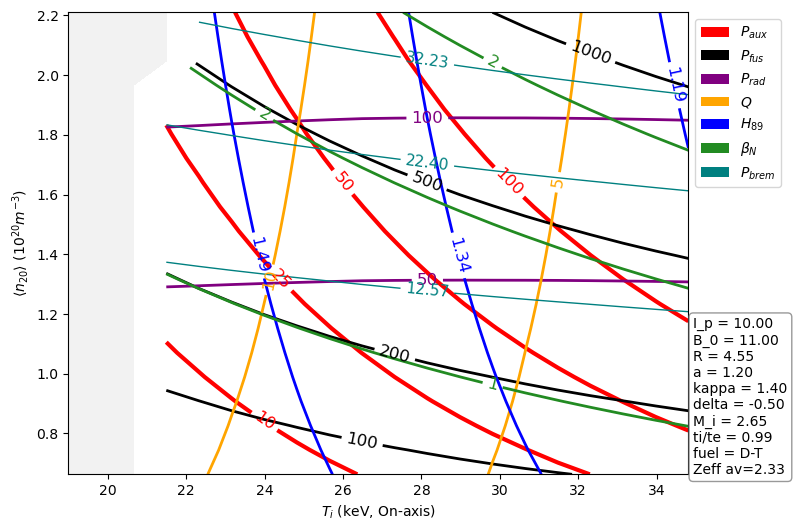

In [ ]:
pc.update_plotsettings()
fig, ax = pc.plot(-1,show=False)

B_brem = np.empty((pc.settings.Nn, pc.settings.NTi))
rho = pc.params[-1].sqrtpsin
for i in range(pc.settings.Nn):
    for j in range(pc.settings.NTi):
        B_brem[i,j] = pc.params[-1].volume_integral(rho, pc.params[-1]._P_brem_rad(rho, pc.outputs[-1].T_e_max[j], pc.outputs[-1].n_e_20_max[i]))
pc.custom_plot(fig, ax, -1, B_brem, np.linspace(np.min(B_brem), np.max(B_brem), 5), 'teal', 1., r'$P_{brem}$')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$T_i$ (keV, On-axis)', ylabel='$\\langle n_{20}\\rangle$ ($10^{20} m^{-3}$)'>)


Params:
n_i_average = 1.781052550187202 x 10^20 m^-3
n_e_average = 1.945 x 10^20 m^-3
n_G = 2.210 x 10^20 m^-3
n_i_axis = 2.781 x 10^20 m^-3
n_e_axis = 3.037 x 10^20 m^-3
Ti_average = 7.3 keV
Ti_axis = 23.1 keV
Solution:
P_aux = 38.76 MW
P_fusion = 489.87 MW
P_SOL = 129.15 MW
P_load = 0.484 MW/m^2
P_ohmic = 0.736 MW
P_rad = 111.91 MW
P_heat = 137.85 MW
P_alpha = 97.97 MW
P_dd = 0.569 MW
P_dt = 489.30 MW
Wtot/TauE = 129.15 MW
f_rad = 0.464 
tauE = 0.952 s
Q = 12.402 MW
H89 = 1.49
H98 = 0.79
vloop = 0.0736 V
betaN = 2.118



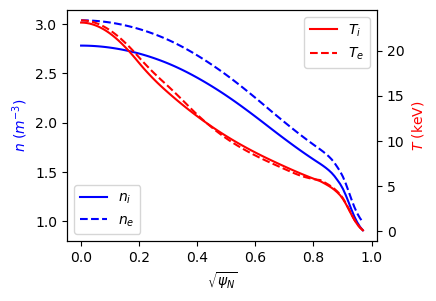

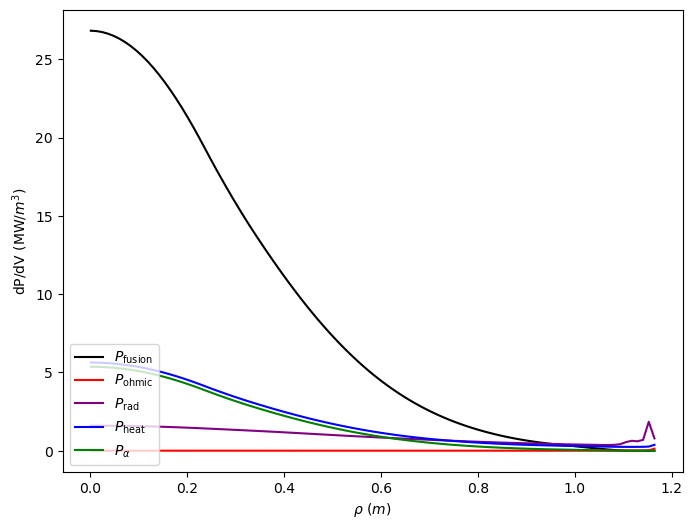

In [5]:
pc.single_point(-1,n_G_frac=0.88,Ti_av=7.3)

In [12]:
np.average(pc.params[-1].get_extprof(np.linspace(0,1,1000),2))

0.7716407741416288

array([False, False, False, False, False, False, False, False, False,
       False])